In [119]:
import pandas
import numpy
from n2lite import n2lite
import matplotlib.pyplot as plt

In [120]:
path_HOT = '/home/amigos/data/sql/nasco_20181101_123536.db'
path_COLD = '/home/amigos/data/sql/nasco_20181101_123724.db'

In [121]:
beam = '5l'
D_HOT = n2lite.N2lite(path_HOT)
D_COLD = n2lite.N2lite(path_COLD)
d_HOT = D_HOT.read_pandas_all()
d_COLD = D_COLD.read_pandas_all()

In [122]:
d2_HOT_groupby = d_HOT.groupby('loatt_'+beam)
d2_COLD_groupby = d_COLD.groupby('loatt_'+beam)
loatt_HOT_mean =d2_HOT_groupby.mean()
loatt_COLD_mean =d2_COLD_groupby.mean()

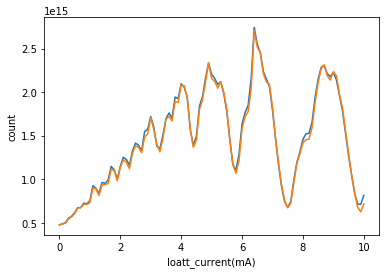

In [123]:
# HOT/COLD 生データ　

plt.plot(loatt_HOT_mean.index,loatt_HOT_mean['xffts_1'])
plt.plot(loatt_COLD_mean.index,loatt_COLD_mean['xffts_1'])
plt.xlabel('loatt_current(mA)')
plt.ylabel('count')
plt.show()

最適パラメータ    beam5l
Trx    : -2101012.3415198396 (K)
loatt  : 9.600000000000001 (mA)
sis_cur: 175.14935661764707 (mA)
sis_vol: 8.985236672794118 (mV)


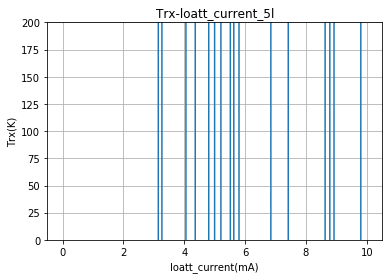

In [124]:
# Trx - loatt_current 曲線　

Y = loatt_HOT_mean['xffts_1']/loatt_COLD_mean['xffts_1']
Trx = (300-Y*77)/(Y-1)
plt.plot(Trx)
plt.ylim(0,200)
plt.grid()
plt.xlabel('loatt_current(mA)')
plt.ylabel('Trx(K)')
plt.title('Trx-loatt_current_'+beam)

loatt_HOT_mean = loatt_HOT_mean.rename(columns = {'xffts_1':'count'})
T = pandas.concat([loatt_HOT_mean,Trx],axis = 1)
T = T.rename(columns = {'xffts_1':'Trx'})

t= T.loc[T['Trx'].idxmin()]
print('最適パラメータ:','   beam'+beam)
print('Trx    :',t['Trx'],'(K)')
print('loatt  :',T['Trx'].idxmin(),'(mA)')
print('sis_cur:',t['sis_cur_'+beam],'(mA)')
print('sis_vol:',t['sis_vol_'+beam],'(mV)')

In [117]:
loatt_HOT_mean = loatt_HOT_mean.rename(columns = {'xffts_1':'count'})
T = pandas.concat([loatt_HOT_mean,Trx],axis = 1)
T = T.rename(columns = {'xffts_1':'Trx'})